In [267]:
import os
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [268]:
# Works for both Expectancy & Plausbility and Frame Valence & Arousal
def CombineLists(path):
    os.chdir(path)
    files = [[f for f in files if f.startswith('List')] for root, dirs, files in os.walk(path, topdown=True)][0]
    dataframes = []
    i = 0
    while 1:
        try:
            df1 = pd.concat((pd.read_excel(files[4*i]).transpose().iloc[3:-1],
                             pd.read_excel(files[4*i+1]).transpose().iloc[3:-1]))
            df2 = pd.concat((pd.read_excel(files[4*i+3]).transpose().iloc[3:-1],
                             pd.read_excel(files[4*i+2]).transpose().iloc[3:-1]))
        
            dim1 = pd.concat((df1.iloc[[i for i in range(len(df1)) if i%2==0]].reset_index(),
                              df2.iloc[[i for i in range(len(df2)) if i%2==0]].iloc[::-1].reset_index(drop=True).rename(columns=lambda x: x+len(df1.columns))),
                              axis=1)
            dim2 = pd.concat((df1.iloc[[i for i in range(len(df1)) if i%2!=0]].reset_index(),
                              df2.iloc[[i for i in range(len(df2)) if i%2!=0]].iloc[::-1].reset_index(drop=True).rename(columns=lambda x: x+len(df1.columns))),
                              axis=1)     
            dataframes.append((dim1, dim2))
        
            i += 1
        except IndexError:
            break
    
    combined1, combined2 = dataframes[0][0], dataframes[0][1]
    for j in range(1,len(dataframes)):
        combined1 = pd.concat((combined1, dataframes[j][0])).rename(columns=lambda x: 'Ans.'+str(x+1) if type(x)!=str else 'Sentences')
        combined2 = pd.concat((combined2, dataframes[j][1])).rename(columns=lambda x: 'Ans.'+str(x+1) if type(x)!=str else 'Sentences')
        
    return combined1, combined2

In [269]:
os.chdir('C:\\Users\\amand')
exp, plaus = CombineLists('C:\\Users\\amand\\Downloads\\tests')

In [270]:
# Works for both Expectancy & Plausbility and Frame Valence & Arousal
def MeanStd(df, outfile, start=1):
    mean, std = np.empty(len(df)), np.empty(len(df))
    for i in range(len(df)):
        ans = np.array([df.iloc[i][j] for j in range(start,len(df.columns)) if pd.isnull(df.iloc[i][j])==False])
        mean[i], std[i] = np.mean(ans), np.std(ans)
    
    df.insert(len(df.columns), 'mean', mean)
    df.insert(len(df.columns), 'std', std)

    df.to_excel(outfile, index=False)
    print('Rating results (individual dimension) saved as "' + outfile + '" in ' + os.getcwd())
    return df

In [271]:
exp_res = MeanStd(exp, 'exp_res.xlsx')
plaus_res = MeanStd(plaus, 'plaus_res.xlsx')

Rating results (individual dimension) saved as "exp_res.xlsx" in C:\Users\amand\Downloads\tests
Rating results (individual dimension) saved as "plaus_res.xlsx" in C:\Users\amand\Downloads\tests


In [272]:
def REINDEX(array):
    '''Sorts sentences by a given index in asencing order'''
    array_ascend = np.sort(array)
    unique, idx = [], []
    for i, x in enumerate(array_ascend):
        if x not in unique:
            idx.append(np.where(array==x)[0].tolist())
            unique.append(x)
    return sum(idx, [])

def CompareExpPlaus(path_to_2nd_ratings_random_sort, exp_res, plaus_res, outfile):
    pwd = os.getcwd()
    os.chdir(path_to_2nd_ratings_random_sort)
    df = pd.concat((pd.read_excel('2nd_ratings_random_sort.xlsx', sheet_name='2nd_List1_plaus_exp')[['Index', 'Sentences', 'Cloze']],
                    pd.read_excel('2nd_ratings_random_sort.xlsx', sheet_name='2nd_List1_plaus_exp')[['Index', 'Sentences', 'Cloze']]))
    df.insert(len(df.columns), 'Exp. mean', exp_res['mean'])
    df.insert(len(df.columns), 'Plaus. mean', plaus_res['mean'])
    df = df[df['Index']!=-1].reset_index(drop=True)
    df = df.reindex(REINDEX(df['Cloze']))
    os.chdir(pwd)
    df.to_excel(outfile, index=False)
    print('Combined results saved as "' + outfile + '" in ' + os.getcwd())
    return df

In [273]:
combinedRes = CompareExpPlaus('C:\\Users\\amand\\Downloads\\exp_plaus_test', exp_res, plaus_res, 'combinedRes.xlsx')
combinedRes

Combined results saved as "combinedRes.xlsx" in C:\Users\amand\Downloads\tests


,Index,Sentences,Cloze,Exp. mean,Plaus. mean
4,1074,攻讀博士過程極其艱辛，其中最重要的是維持人脈。,0.000000,4.538462,4.538462
5,1364,他是全村第一位考上大學的人，是全村的英雄。,0.000000,4.846154,4.923077
7,1208,他在籃球大賽上叱吒風雲，得冠軍爽領十萬元的兩雙鞋。,0.000000,4.076923,4.769231
8,1100,疫情好不容易解封，我們全家人一起到歐洲爬山。,0.000000,4.692308,4.538462
10,1020,憂鬱纏身多年讓他痛苦得生不如死，才會想結束。,0.000000,4.076923,4.153846
...,...,...,...,...,...
410,1176,不滿警察的暴力差別待遇，非裔美國人紛紛上街抗議。,0.866667,3.857143,4.642857
411,1125,完整填答完這份問卷後，請您在下方簽名。,0.866667,4.214286,4.214286
414,1160,他利用颱風天偷偷潛入公司，不免讓人心生懷疑。,0.866667,3.357143,4.357143
415,1121,買了零食和咖啡提神，等一下上數學才不會睡著。,0.866667,4.214286,4.428571


In [274]:
def PlotsAndTables(df, scatterName, boxplotName):
    display(df[['Exp. mean', 'Plaus. mean']].corr(numeric_only=False))

    figure, axis = plt.subplots(1,2, figsize=(13,5))
    axis[0].scatter(df['Cloze'], df['Exp. mean'])
    axis[0].set_xlabel('Cloze')
    axis[0].set_ylabel('Expectancy')
    axis[0].set_title('Cloze vs Expectancy', fontsize=16)
    axis[1].scatter(df['Plaus. mean'], df['Exp. mean'])
    axis[1].set_title('Plausibility vs Expectancy', fontsize=16)
    axis[1].set_xlabel('Plausibility')
    axis[1].set_ylabel('Expectancy')
    plt.savefig(scatterName)
    plt.show()
    
    E_sent, U_sent = df[df['Cloze'] != 0], df[df['Cloze'] == 0]
    to_plot = [E_sent['Plaus. mean'], U_sent['Plaus. mean'], E_sent['Exp. mean'], U_sent['Exp. mean']]
    xticks = ['Exp. Plausilibity', 'Unexp. Plausibility', 'Exp. Expectancy', 'Unexp. Expectancy']

    figure = plt.figure(figsize =(10, 7))
    plt.boxplot(to_plot)
    plt.xticks([1,2,3,4], xticks)
    plt.savefig(boxplotName)
    plt.show()
    
    table = pd.DataFrame({'Exp. Sentences': [E_sent['Plaus. mean'].mean(), E_sent['Exp. mean'].mean()],
                          'Unexp. Sentences': [U_sent['Plaus. mean'].mean(), U_sent['Exp. mean'].mean()]},
                           index=['Plausibility', 'Expectancy'])
    display(table)

,Exp. mean,Plaus. mean
Exp. mean,1.000000,0.057304
Plaus. mean,0.057304,1.000000


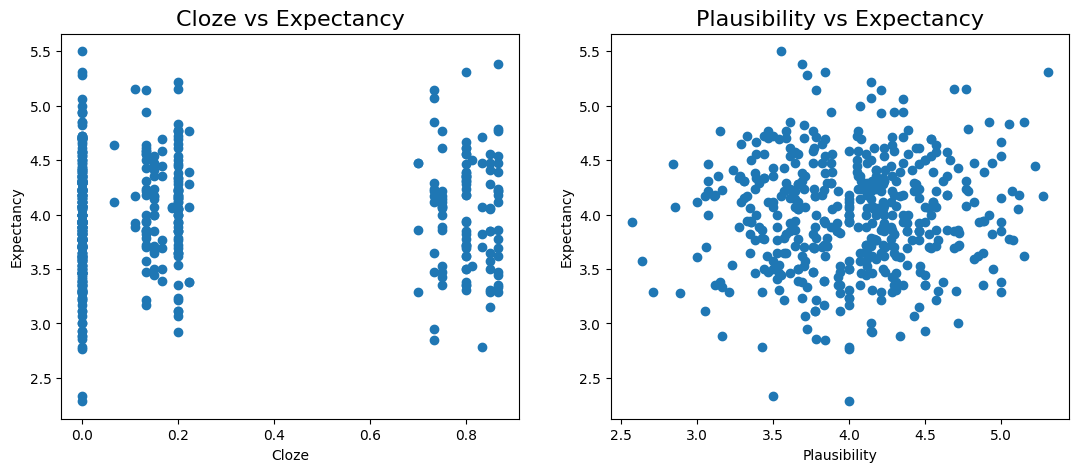

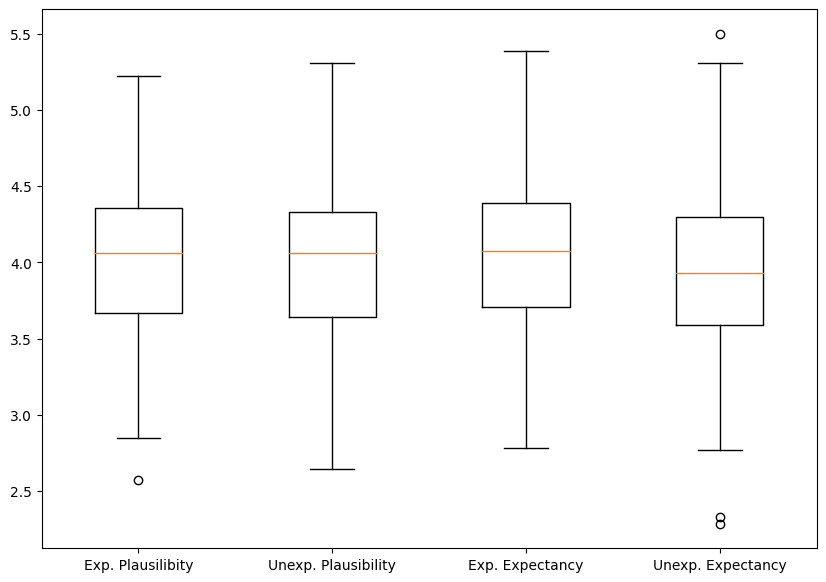

,Exp. Sentences,Unexp. Sentences
Plausibility,4.029334,4.021399
Expectancy,4.055294,3.942885


In [275]:
PlotsAndTables(combinedRes, 'scatterName.png', 'boxplotName.png')

In [276]:
def main(pathToResponses, expResName, plausResName, pathToInfo, combinedResName, scatterName, boxplotName):
    exp, plaus = CombineLists(pathToResponses)
    exp_res, plaus_res = MeanStd(exp, expResName), MeanStd(plaus, plausResName)
    combined_res = CompareExpPlaus(pathToInfo, exp_res, plaus_res, combinedResName)
    PlotsAndTables(combined_res, scatterName, boxplotName)

Rating results (individual dimension) saved as "exp_res.xlsx" in C:\Users\amand\Downloads\tests
Rating results (individual dimension) saved as "plaus_res.xlsx" in C:\Users\amand\Downloads\tests
Combined results saved as "combined_res.xlsx" in C:\Users\amand\Downloads\tests


,Exp. mean,Plaus. mean
Exp. mean,1.000000,0.057304
Plaus. mean,0.057304,1.000000


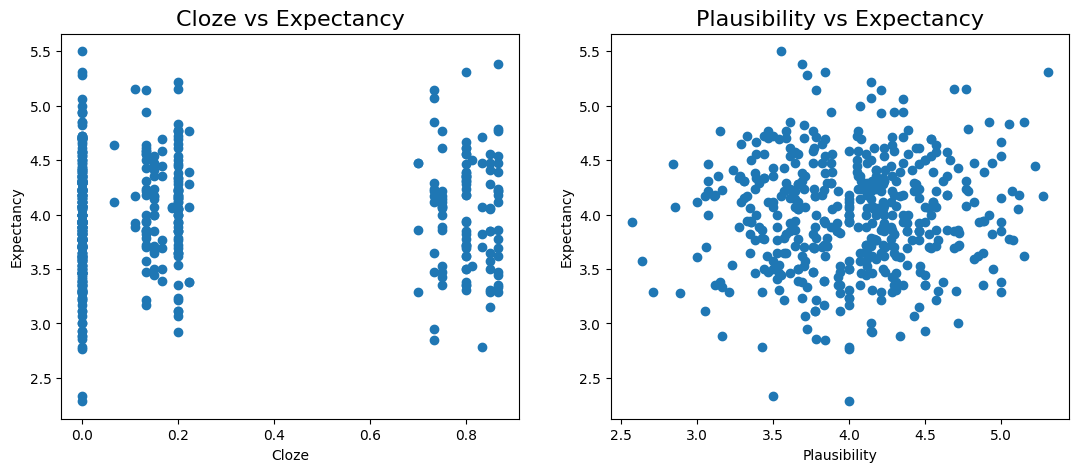

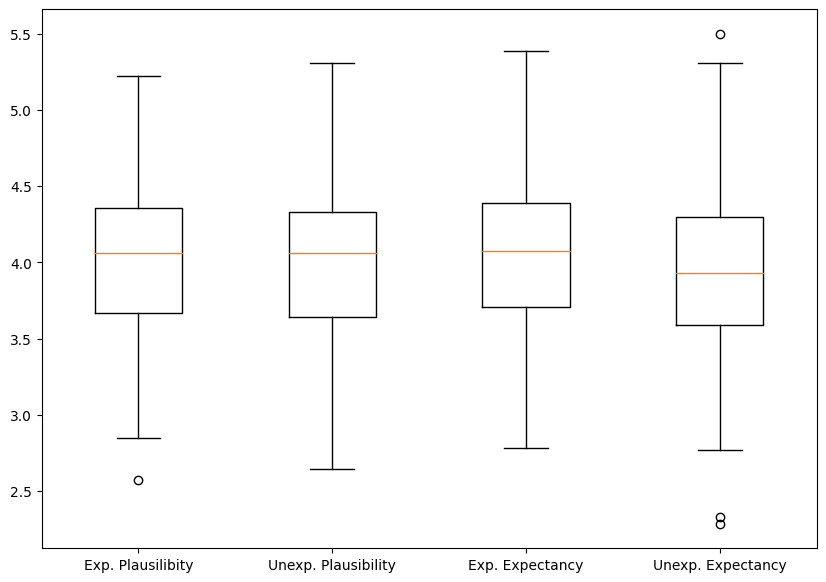

,Exp. Sentences,Unexp. Sentences
Plausibility,4.029334,4.021399
Expectancy,4.055294,3.942885


In [277]:
main('C:\\Users\\amand\\Downloads\\tests',
     'exp_res.xlsx', 'plaus_res.xlsx',
     'C:\\Users\\amand\\Downloads\\exp_plaus_test', 'combined_res.xlsx',
     'scatter.png','boxplot.png')

In [279]:
os.getcwd()

'C:\\Users\\amand\\Downloads\\tests'